
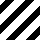
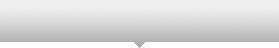
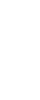
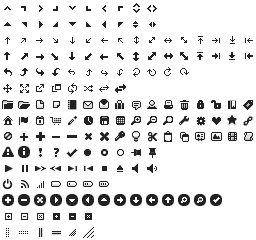
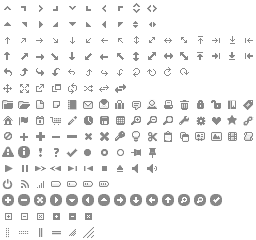
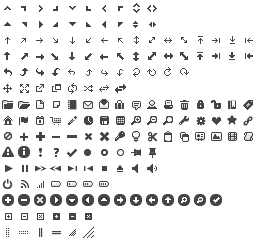
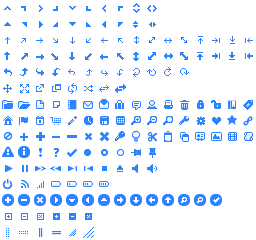
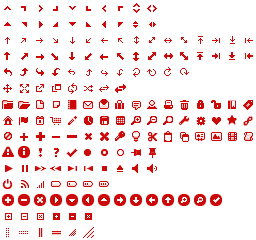
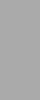
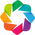
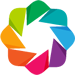
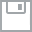
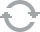
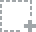
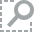
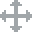
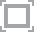
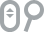

In [2]:
# Our numerical workhorses
import numpy as np
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 1, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5', 
      'lines.markerstyle': None}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

First, let's try plotting the example function $y = a + bx$ with various values for each of the parameters:

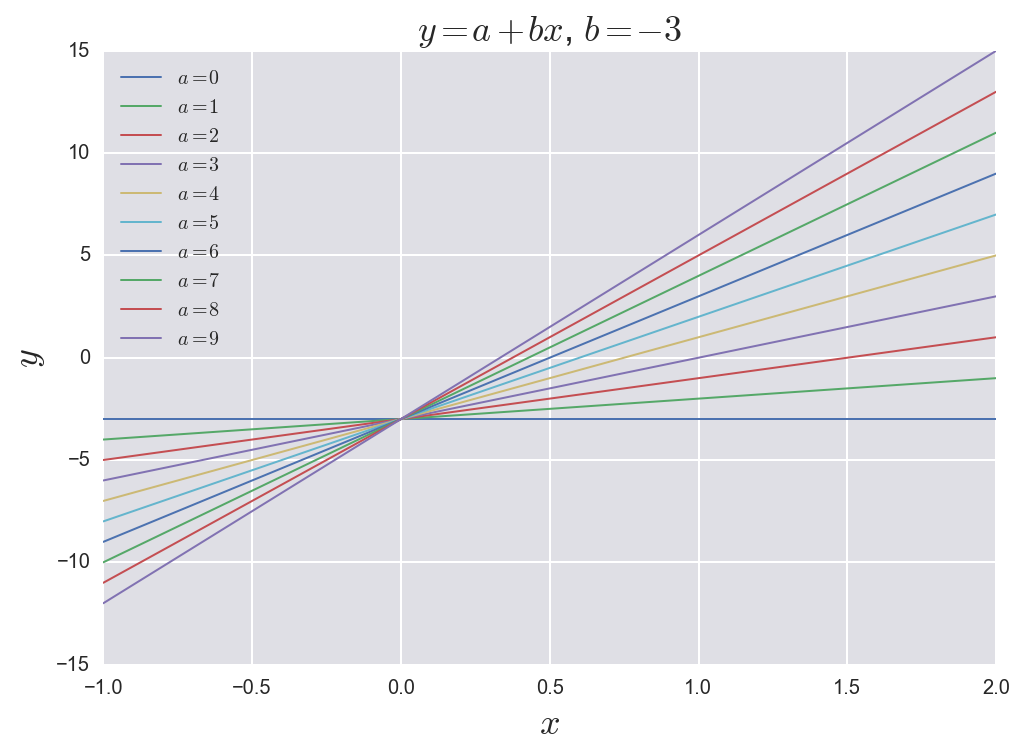

In [3]:
# Example
def lin_func(p, x):
    """
    Returns `p`[0] * `x` + `p`[1].
    """
    a, b = p
    return a * x + b

# Make a set of evenly spaced points in x
x = np.linspace(-1.0, 2.0, 50)

# Plot several lines with varying a values
# Initialise legend list
legend_list = []
for i in range(10):
    _ = plt.plot(x, lin_func(np.array([i, -3]), x))
    legend_list.append(r'$a = {}$'.format(i))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.legend(legend_list, loc='best')
plt.title('$y = a + bx$, $b = -3$')

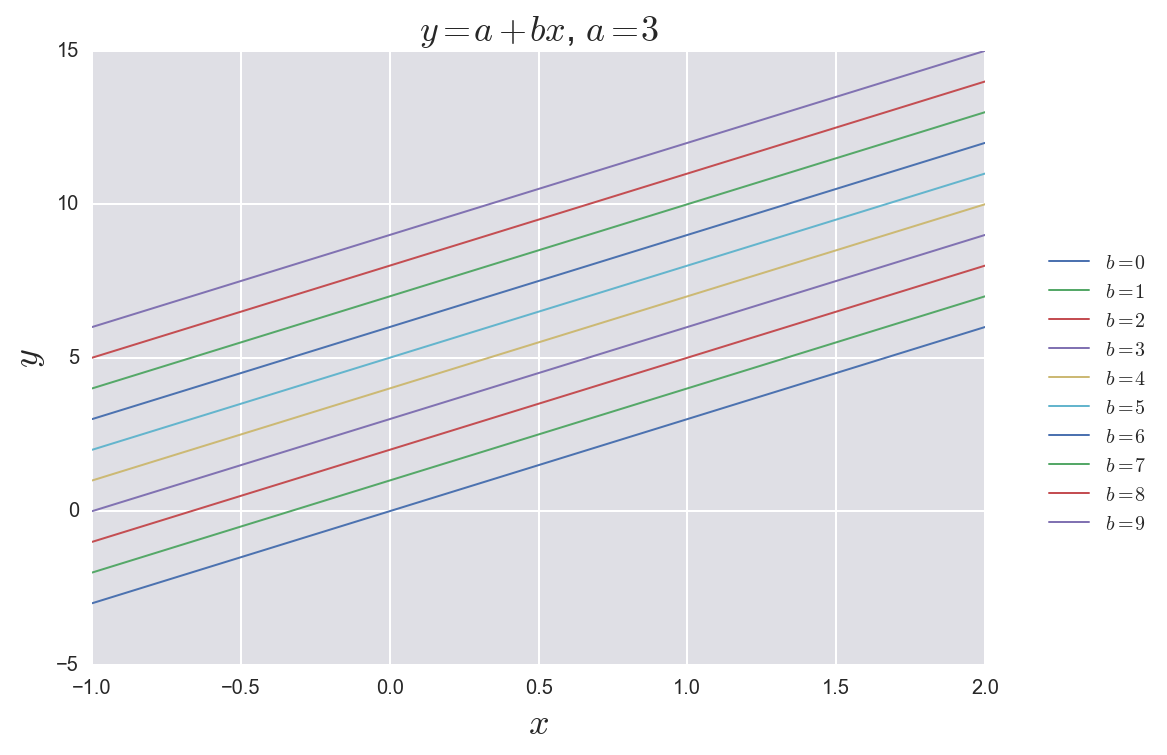

In [4]:
# Plot several lines with varying b values
# Initialise legend list
legend_list = []
for i in range(10):
    _ = plt.plot(x, lin_func(np.array([3, i]), x))
    legend_list.append(r'$b = {}$'.format(i))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
# Legend no longer fits in graph comfortably, so let's place it outside.
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title('$y = a + bx$, $a = 3$')

We have verified that for a linear function, changing $a$ affects the slope and changing $b$ affects the intercept (as expected!)

## 1.2a Exponential decay and background signal

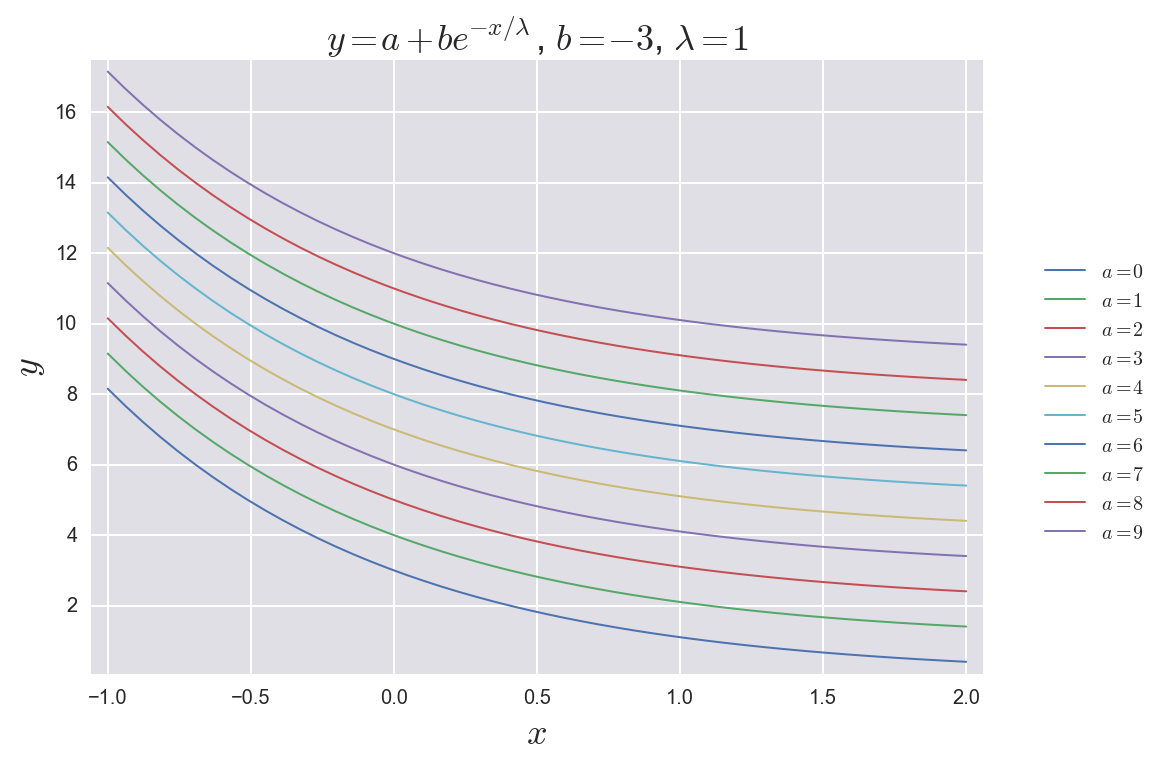

In [5]:
# 1.2a Exponential decay and background signal 
# y=a+b*exp(−x/λ)
def exp_decay(p,x):
    '''
    Returns the value(s) of the exponential decay with background signal at x. 
    '''
    a,b,lam = p
    return a + b*np.exp(-x/lam)

# Plot several lines with varying a values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.plot(x, exp_decay(np.array([i, 3, 1]), x))
    legend_list.append(r'$a = {}$'.format(str(i)))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title('$y = a + be^{-x/\lambda}$, $b = -3$, $\lambda = 1$')

In this model, $a$ represents the background signal. Therefore increasing $a$ translates the whole curve upwards (this is expected, as background signal should be equal for all $x$).

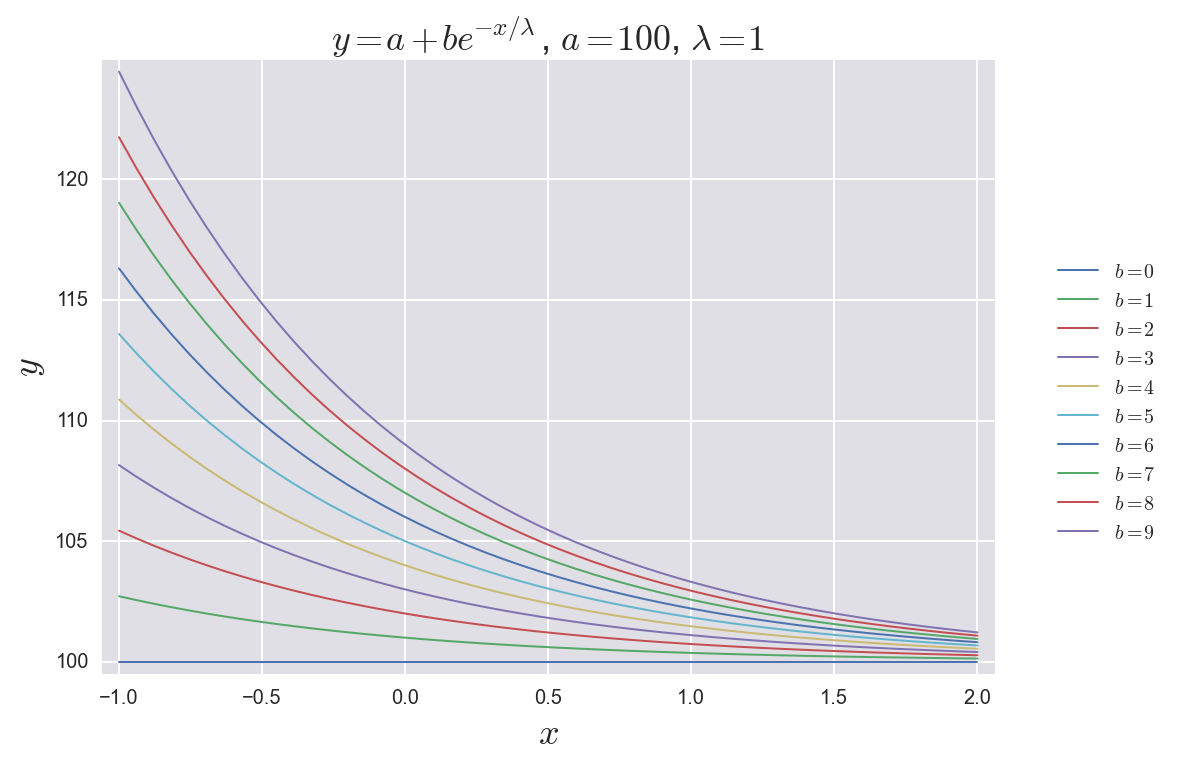

In [6]:
# Plot several lines with varying b values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.plot(x, exp_decay(np.array([100 , i, 1]), x))
    legend_list.append(r'$b = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title('$y = a + be^{-x/\lambda}$, $a = 100$, $\lambda = 1$')

$b$ is a y-scaling factor. Practically, this actually just translates the curve in $x$, because it is self-similar. The half-life remains the same.

In [37]:
print(exp_decay([0,10,2],0))
print(exp_decay([0,10,2],(-2*np.log(0.5))))

10.0
5.0


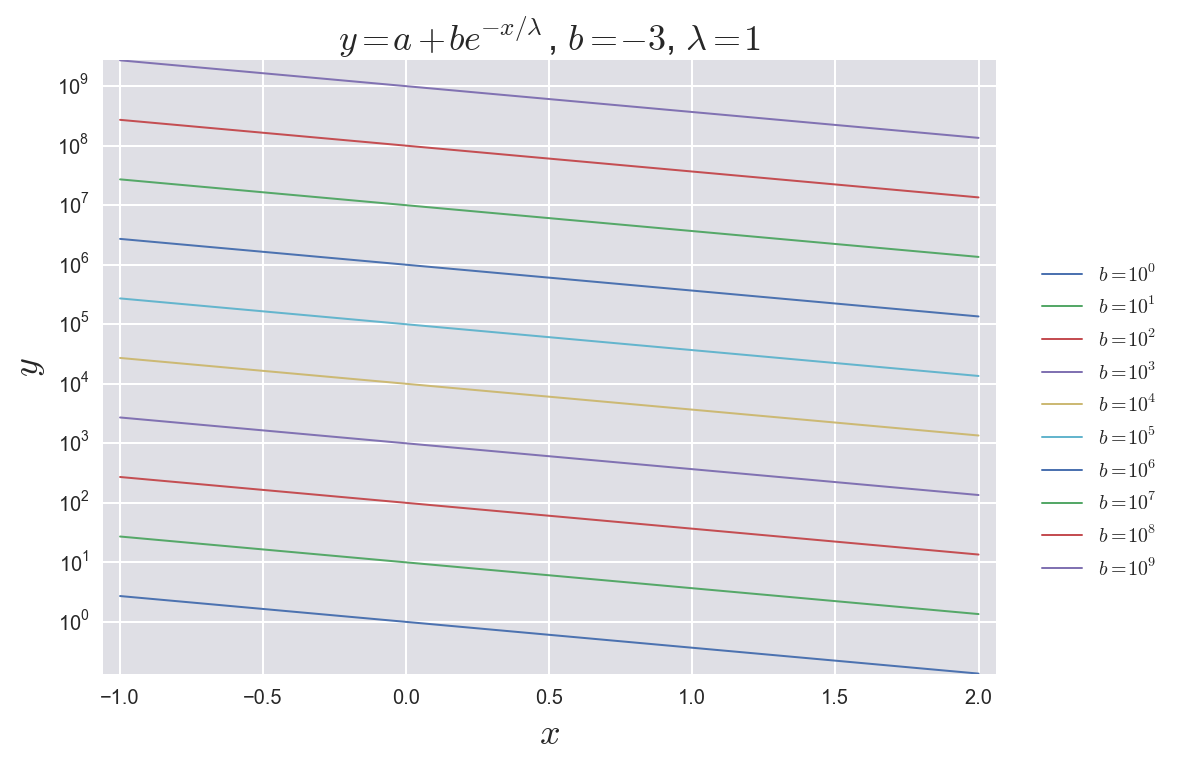

In [7]:
# Plot several lines with varying b values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.semilogy(x, exp_decay(np.array([0, 10**i, 1]), x))
    legend_list.append('$b = 10^{}$'.format(str(i)))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title('$y = a + be^{-x/\lambda}$, $b = -3$, $\lambda = 1$')

A semilog plot makes it easy to see that for a = 0 the intercept is at b.

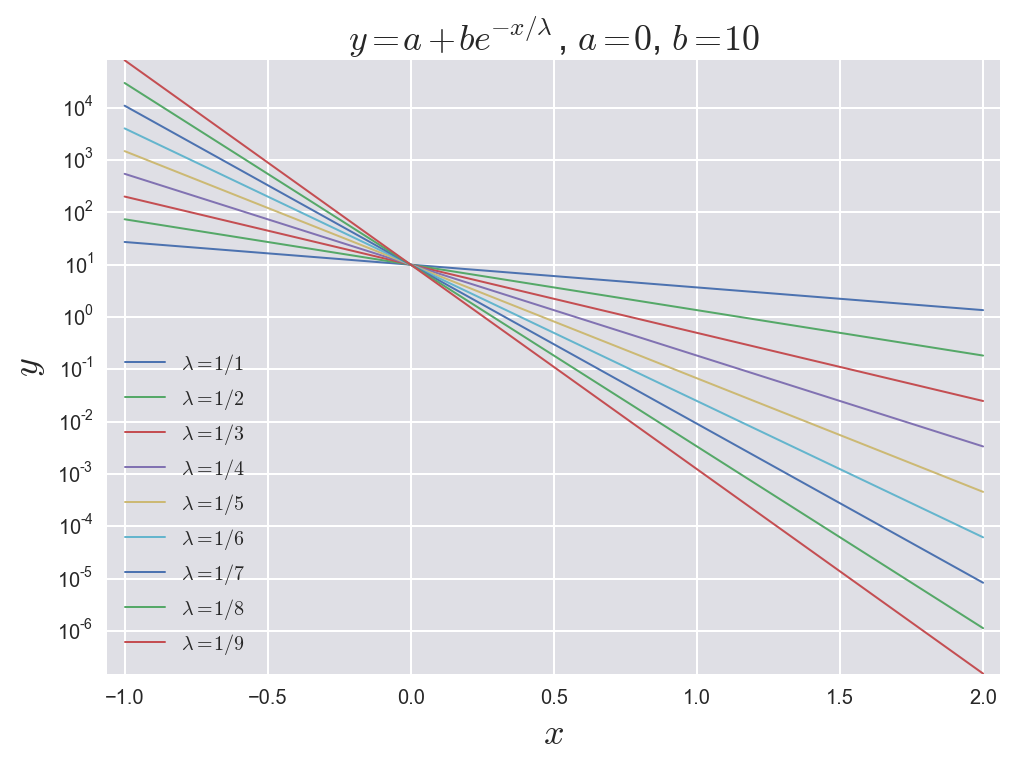

In [8]:
# Plot several lines with varying b values
# Initialise legend list
legend_list = []
for i in range(1, 10):
    plt.semilogy(x, exp_decay(np.array([0, 10, 1/i]), x))
    legend_list.append(r'$\lambda = 1/{}$'.format(str(i)))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.legend(legend_list, loc='best')
plt.title('$y = a + be^{-x/\lambda}$, $a = 0$, $b = 10$')

For a = 0, the slope of a semilog plot is $-\frac{1}{\lambda}$.
This is obvious from the graph above, but also easy to show analytically:
$y = a + be^{-\frac{x}{\lambda}}$

For $a = 0$:

$y = be^{-\frac{x}{\lambda}}$

$\text{ln}(y) = \text{ln}(be^{-\frac{x}{\lambda}})$

$\text{ln}(y) = \text{ln}(b) - \frac{x}{\lambda}$

$\text{ln}(y)|_{x=0} = \text{ln}(b)$, so intercept is at $\text{ln}(b)$

$\frac{\text{d}\text{ln}(y)}{\text{d}x} = -\frac{1}{\lambda}$, so slope is $-\frac{1}{\lambda}$

This does not work for cases where $a \neq 0$. Because $a$ represents background in this model, what this means is that it is much easier to analyse your data and pull out relevant parameters when you have a high signal-to-noise ratio, or when you have removed the noise (in both cases, $a \approx 0$). This makes intuitive sense, and also, for this model, mathematical sense.

What does $\lambda$ actually mean, though? Well, if the slope of the curve of a semilog plot is $-\frac{1}{\lambda}$, then lambda must affect the half-life. Specifically, the half-life is $-\lambda\text{ln}(\frac{1}{2})$.

Analytically:

$y = be^{-\frac{x}{\lambda}}$

$\frac{y}{2} = \frac{1}{2}be^{-\frac{x}{\lambda}}$

$\frac{y}{2} = be^{-\frac{x}{\lambda}+\text{ln}(\frac{1}{2})}$

$\frac{y}{2} = be^{-\frac{x-\lambda\text{ln}(\frac{1}{2})}{\lambda}}$


## 1.2b The Cauchy distribution

Unlike the previous function, there is no way for plotting this on log or semilog axes to help in interpreting the function. A casual glance makes this obvious:

$y = \frac{\beta}{\pi(\beta^2+(x-\alpha)^2)}$

$\text{ln}(y) = \text{ln}(\beta) - \text{ln}(\pi(\beta^2+(x-\alpha)^2))$

which does not separate out the variables into different terms, unless we set $\beta$ to zero (in which case there is only one term anyway, and $y = 0$ for all $x$). So this is not useful, we will plot on linear axes.

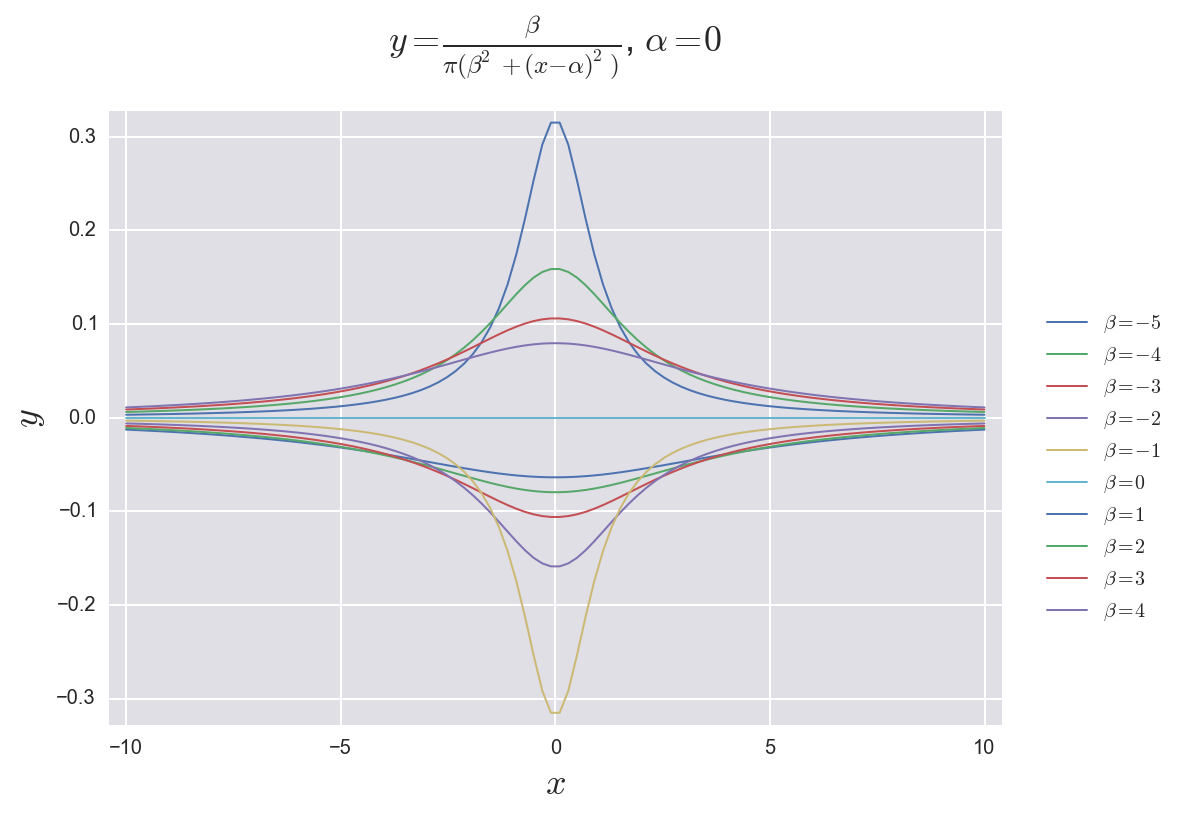

In [9]:
# 1.2b The Cauchy distribution:
# y=β/[π(β2+(x−α)2)]
def cauchy(p,x):
    '''
    Returns the value(s) of the Cauchy distribution at x
    '''
    beta, alpha = p
    return beta / (np.pi*(beta**2 + (x-alpha)**2))

# increase xrange to inspect more of function
x = np.linspace(-10.0, 10.0, 100)

# Plot several lines with varying beta values
# Initialise legend list
legend_list = []
for i in range(-5, 5):
    plt.plot(x, cauchy(np.array([i, 0]), x))
    legend_list.append(r'$\beta = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{\beta}{\pi(\beta^2+(x-\alpha)^2)}$, $\alpha = 0$', y=1.08)

How exciting! Clearly, adjusting $\beta$ changes the height of the peak.

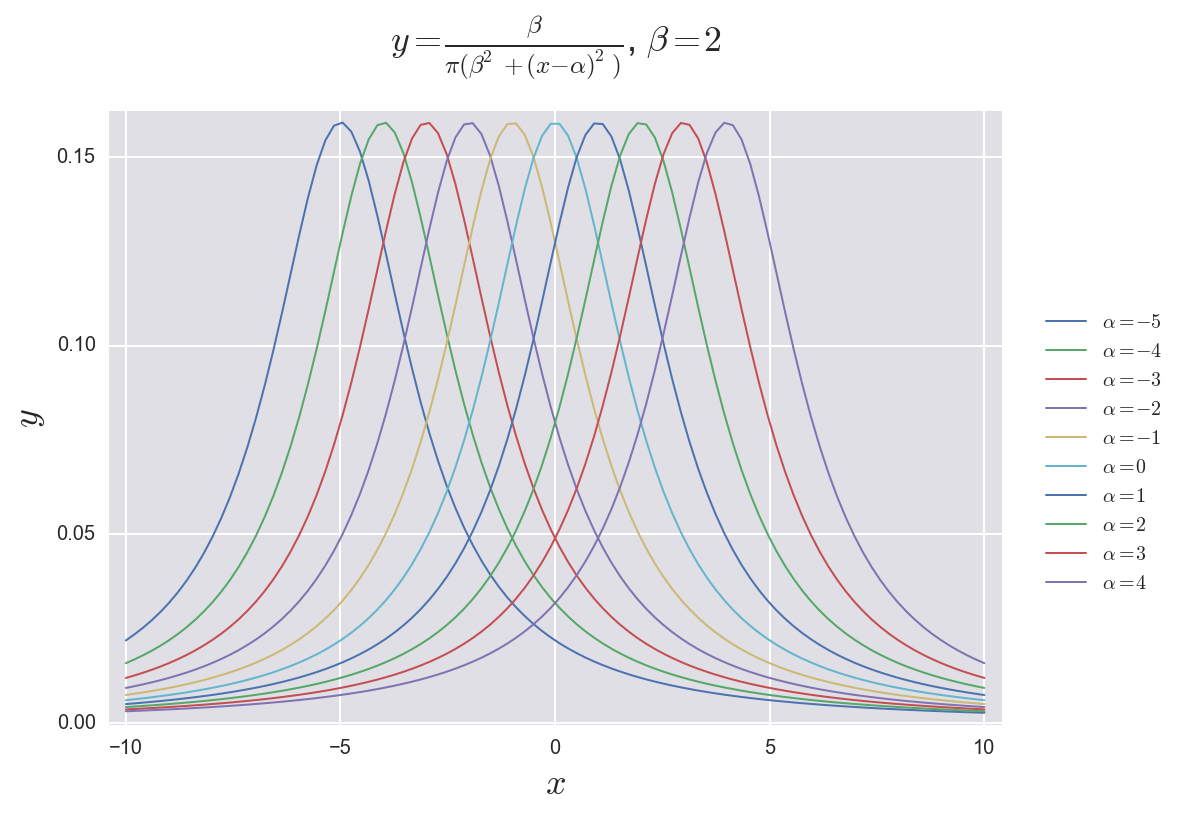

In [10]:
# Plot several lines with varying alpha values
# Initialise legend list
legend_list = []
for i in range(-5, 5):
    plt.plot(x, cauchy(np.array([2, i]), x))
    legend_list.append(r'$\alpha = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{\beta}{\pi(\beta^2+(x-\alpha)^2)}$, $\beta = 2$', y=1.08)

...and changing $\alpha$ translates the whole curve in $x$.

## 1.2c The Hill function

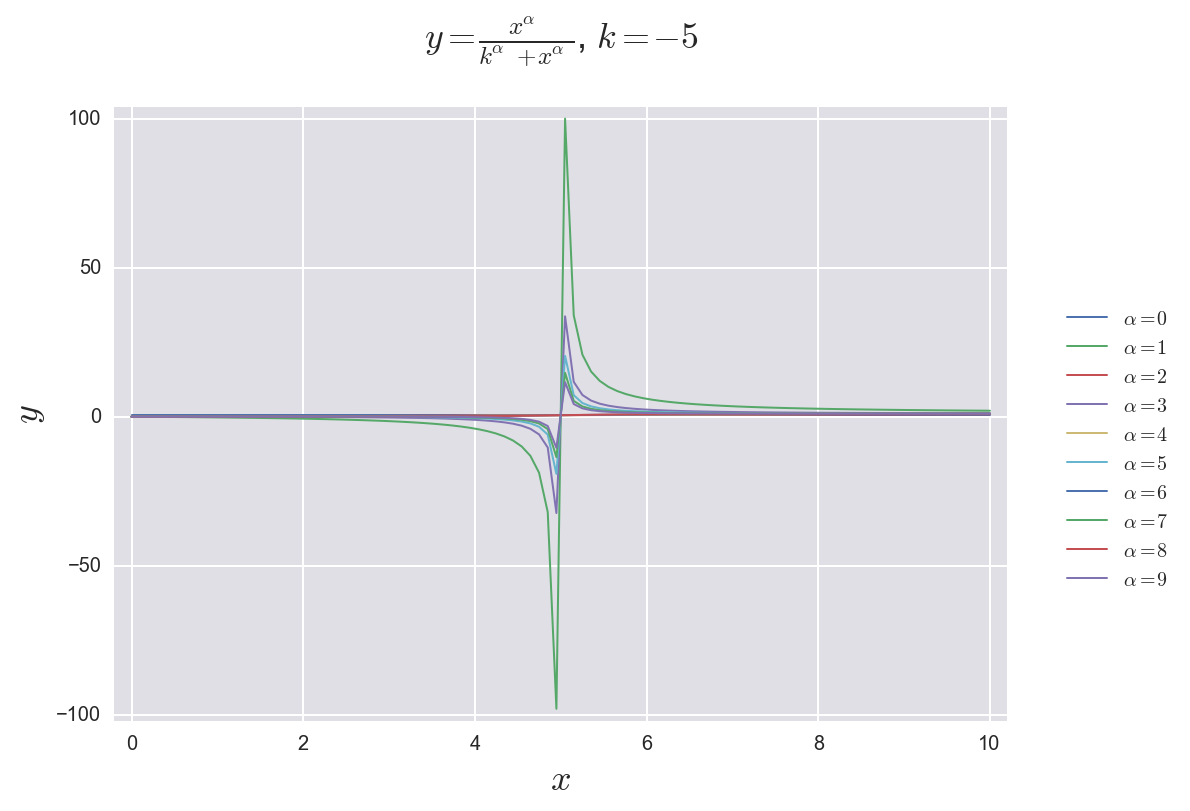

In [11]:
# 1.2c The Hill function:
# y=x**α / (k**α+x**α)
def hill(p,x):
    '''
    Returns the value(s) of the Hill function at x
    '''
    alpha, k = p
    return x**alpha / (k**alpha + x**alpha)

# decrease xrange to zoom in on interesting part of function
x = np.linspace(0, 10.0, 100)

# Plot several lines with varying alpha values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.plot(x, hill(np.array([i, -5]), x))
    legend_list.append(r'$\alpha = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $k = -5$', y=1.08)

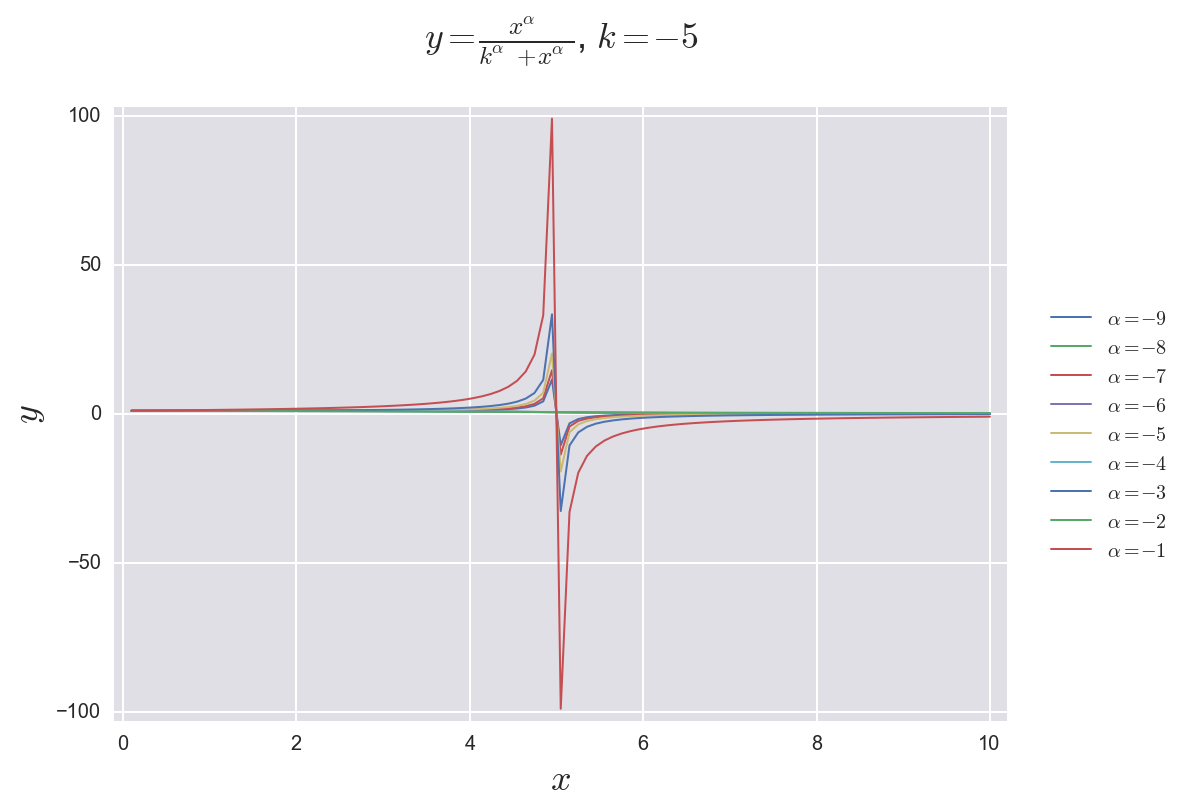

In [12]:
# Plot several lines with varying alpha values, this time negative alphas
# Initialise legend list
legend_list = []
for i in range(-9,0):
    plt.plot(x, hill(np.array([i, -5]), x))
    legend_list.append(r'$\alpha = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $k = -5$', y=1.08)

This is a very strange function, especially for small, negative $k$ values. I attempted to plot using a for loop, but I couldn't fit all the variety into one plot, so I made several separate ones.
alpha=-8 behaves completely differently from other nearby alpha values:
N.B. I am only using integer alpha values because non-integer alpha values can give complex solutions for negative x, k (because x^1/2 = sqrt(x))

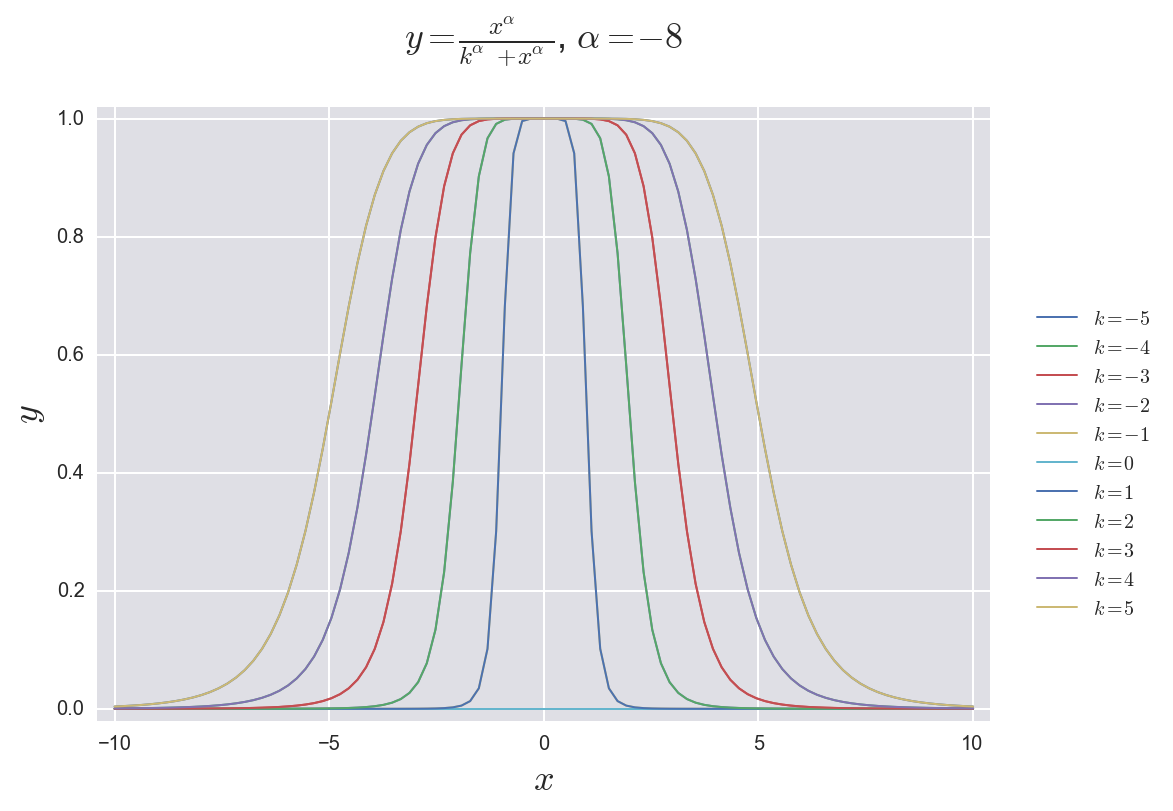

In [16]:
# Plot several lines with varying k values, alpha = -8

# xrange
x = np.linspace(-10, 10, 100)

# Initialise legend list
legend_list = []
for i in range(-5,6):
    plt.plot(x, hill(np.array([-8, i]), x))
    legend_list.append(r'$k = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $\alpha = -8$', y=1.08)

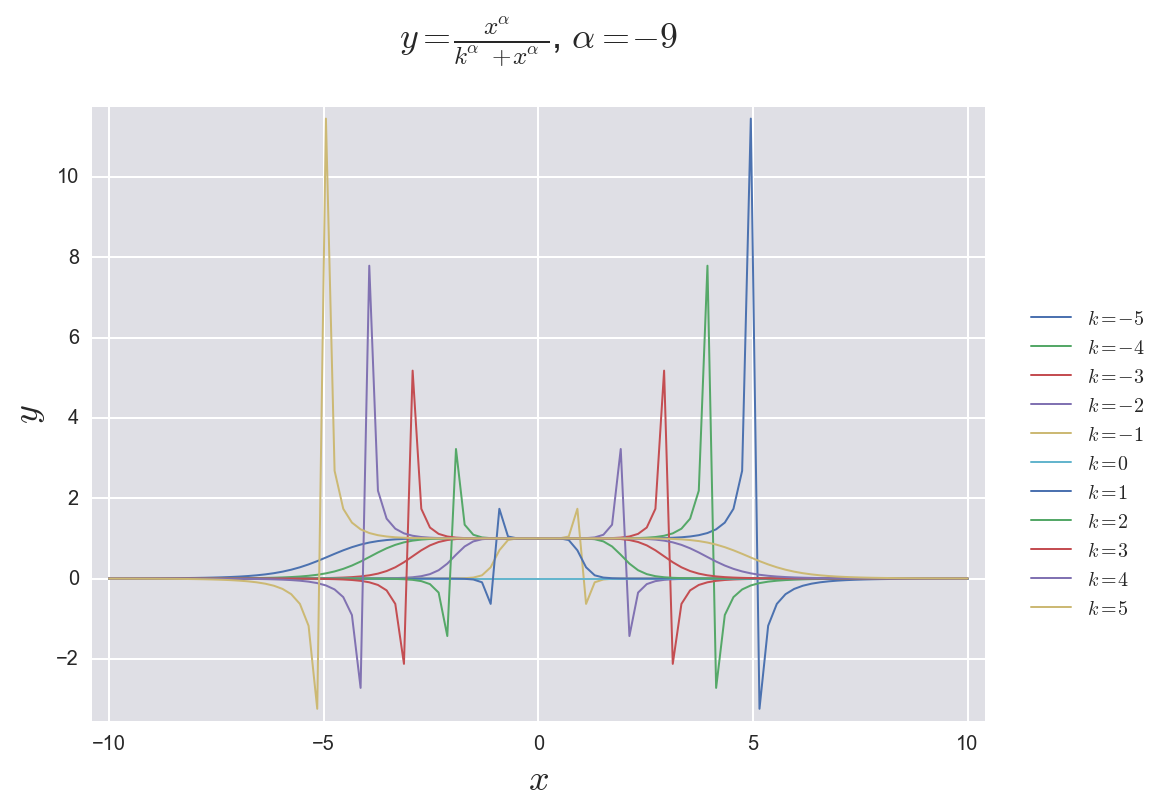

In [17]:
# Initialise legend list
legend_list = []
for i in range(-5,6):
    plt.plot(x, hill(np.array([-9, i]), x))
    legend_list.append(r'$k = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $\alpha = -9$', y=1.08)

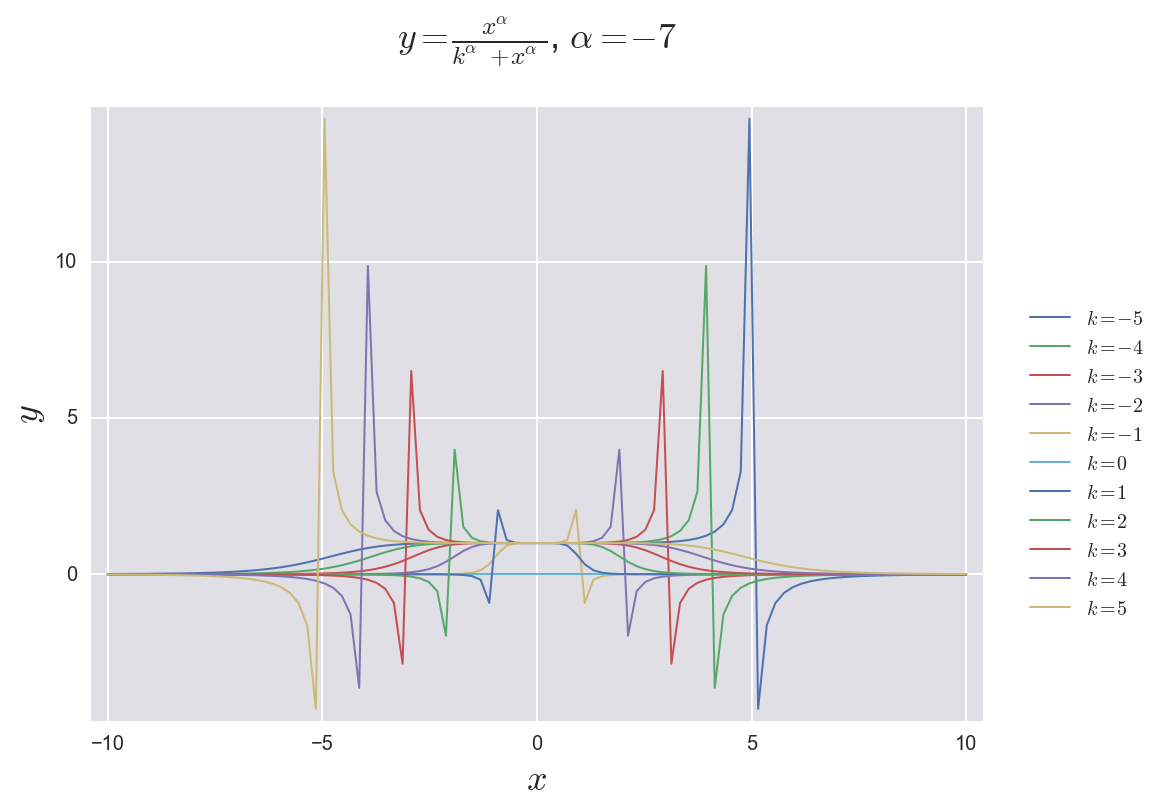

In [18]:
# Initialise legend list
legend_list = []
for i in range(-5,6):
    plt.plot(x, hill(np.array([-7, i]), x))
    legend_list.append(r'$k = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $\alpha = -7$', y=1.08)

We see from above that alpha = -7 is qualitatively similar to alpha = -9, but very different to alpha = -8. It would be convenient to make these plots interactive, so that the variables could be changed by a slider and the whole surface could be explored. A 3-D (or 4-D!) plot would also be useful.

Instead, let's see whether we can tell what's going on analytically:
$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$

via a chain rule and a quotient rule, which I'm not going to $\LaTeX$ out here:

$\frac{\text{d}y}{\text{d}x} = \frac{k^\alpha \alpha x^{\alpha-1}}{(k^\alpha+x^\alpha)^2}$

For $\frac{\text{d}y}{\text{d}x} = 0$:
   
$0 = k^\alpha \alpha x^{\alpha-1}$
    
$k^\alpha = 0$ or $\alpha = 0$ or $x^{\alpha-1} = 0$
    
So there should only be an inflection point at 0. Therefore, what look like inflection points in the graph may actually be asymptotes, and my graph is not infinitely high resolution, so it doesn't capture that.

They are probably where the denominator of $\frac{\text{d}y}{\text{d}x}$ goes to zero (so the slope is more or less $\pm \infty$):

$0 = (k^\alpha+x^\alpha)^2$

$0 = k^{2\alpha} + 2k^\alpha x^\alpha + x^{2\alpha}$

For $\alpha = -8$:

$0 = k^{-16} + 2k^{-8} x^{-8} + x^{-16}$

and then for some reason this does not have any real roots whereas $\alpha \neq -8$ does.

Let's try increasing the resolution, to check:

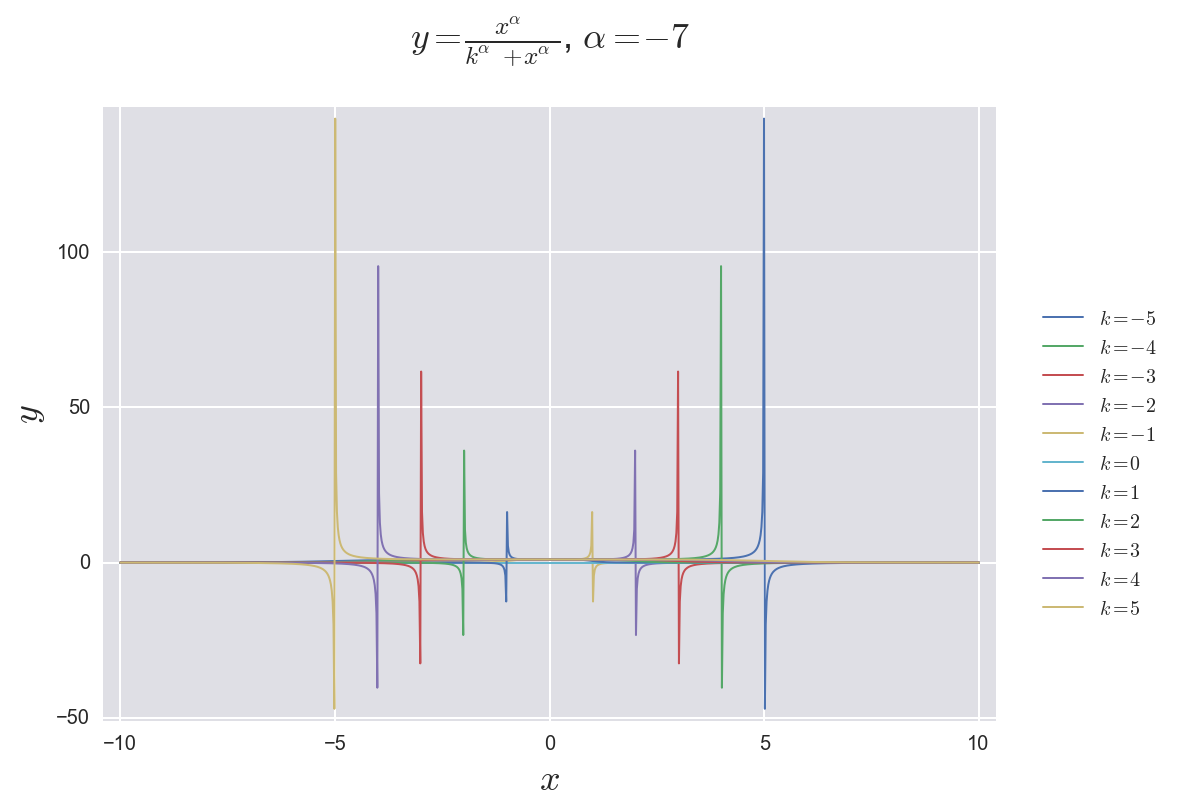

In [23]:
# xrange
x = np.linspace(-10, 10, 1000)

# Initialise legend list
legend_list = []
for i in range(-5,6):
    plt.plot(x, hill(np.array([-7, i]), x))
    legend_list.append(r'$k = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $\alpha = -7$', y=1.08)

Hmm. That is not what I thought was going on. Clearly these peaks don't increase to an asymptote. I am confused.